# Verifica Bus_Tram

In [28]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1495k      0 --:--:-- --:--:-- --:--:-- 1495k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
#per installare
!pip install geopandas

import pandas as pd
import geopandas

In [31]:
linee = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/eserciziGeoPandas/Verifica16 02 2022/tpl_percorsi_shp.zip')
linee

,linea,mezzo,percorso,verso,nome,tipo_perc,lung_km,num_ferm,geometry
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742..."
1,1,TRAM,9457,As,Greco - Roserio,Canonico,13.97,47,"LINESTRING (9.21625 45.49493, 9.21538 45.49486..."
2,10,TRAM,10930,As,Lunigiana - 24 Maggio (LAV. MONUMENTALE),Canonico,10.12,35,"LINESTRING (9.20557 45.49136, 9.20555 45.49137..."
3,10,TRAM,10933,Di,24 Maggio - Lunigiana (LAV. MONUMENTALE),Canonico,9.99,35,"LINESTRING (9.17930 45.45195, 9.17931 45.45195..."
4,115,BUS,10025,As,Gratosoglio - P.za Diaz,Canonico,7.35,21,"LINESTRING (9.17375 45.40309, 9.17381 45.40305..."
...,...,...,...,...,...,...,...,...,...
414,965,BUS,7613,None,Milano - Pioltello,Canonico,11.36,16,"LINESTRING (9.21957 45.48438, 9.21998 45.48436..."
415,98,BUS,7814,Di,Lotto M1 M5 - Famagosta M2,Canonico,8.26,23,"LINESTRING (9.14160 45.47964, 9.14166 45.47953..."
416,98,BUS,9899,As,Famagosta M2 - Lotto M1 M5,Canonico,7.86,23,"LINESTRING (9.16884 45.43677, 9.16884 45.43673..."
417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514..."


In [32]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/eserciziGeoPandas/Geopandas - esercizio riepilogativo in preparazione alla verifica/ds964_nil_wm (1).zip')
quartieri = quartieri.to_crs(4326)
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


Esercizio 1

In [33]:
linee_quart = geopandas.sjoin(linee, quartieri, op='intersects', how='left')
linee_quart

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,linea,mezzo,percorso,verso,nome,tipo_perc,lung_km,num_ferm,geometry,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",7.0,76.0,QUARTO OGGIARO - VIALBA - MUSOCCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7138.355680,2.776872e+06,96.0
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",45.0,74.0,ROSERIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6789.327807,7.076301e+05,134.0
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",13.0,4.0,GUASTALLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6559.532771,1.547962e+06,102.0
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",12.0,1.0,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101.0
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742...",79.0,7.0,MAGENTA - S. VITTORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5492.852406,1.390094e+06,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514...",55.0,85.0,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144.0
417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514...",38.0,38.0,VIGENTINO - Q.RE FATIMA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6479.236348,1.853163e+06,127.0
418,99,BUS,11653,None,Vigentino - Noverasco,Canonico,4.82,8,"LINESTRING (9.20342 45.42120, 9.20287 45.42147...",24.0,39.0,QUINTOSOLE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6740.830821,1.058525e+06,113.0
418,99,BUS,11653,None,Vigentino - Noverasco,Canonico,4.82,8,"LINESTRING (9.20342 45.42120, 9.20287 45.42147...",55.0,85.0,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144.0


In [34]:
linea_user = str(input('inserire nome linea: '))
linee_inp = linee_quart[linee_quart.linea == linea_user]
linee_inp[['NIL']]

inserire nome linea: 1


,NIL
0,QUARTO OGGIARO - VIALBA - MUSOCCO
0,ROSERIO
0,GUASTALLA
0,DUOMO
0,MAGENTA - S. VITTORE
0,BRERA
0,PARCO SEMPIONE
0,PAGANO
0,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE
0,SARPI


Esercizio 2

In [35]:
tram = linee_quart[linee_quart['mezzo'].str.contains('TRAM')]
tram1 = tram[['mezzo','linea','NIL']]
tram1

,mezzo,linea,NIL
0,TRAM,1,QUARTO OGGIARO - VIALBA - MUSOCCO
0,TRAM,1,ROSERIO
0,TRAM,1,GUASTALLA
0,TRAM,1,DUOMO
0,TRAM,1,MAGENTA - S. VITTORE
...,...,...,...
375,TRAM,9,BRERA
375,TRAM,9,GIARDINI P.TA VENEZIA
375,TRAM,9,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE
375,TRAM,9,PORTA GARIBALDI - PORTA NUOVA


Esercizio 3

In [36]:
import pandas as pd

In [37]:
bus = linee_quart[linee_quart['mezzo'].str.contains('BUS')]
linee_quart1 = bus.groupby('NIL', as_index=False)['mezzo'].count().sort_values(by='mezzo',ascending=False)
lq= pd.merge(linee_quart1, quartieri, how= 'outer', on=['NIL'])
lq

,NIL,mezzo,ID_NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,DUOMO,43,1,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ..."
1,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,41,21,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7011.870187,2.877434e+06,159,"POLYGON ((9.22356 45.48603, 9.22358 45.48423, ..."
2,CITTA' STUDI,40,22,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6007.783217,2.207404e+06,165,"POLYGON ((9.23797 45.46971, 9.23671 45.46966, ..."
3,LORENTEGGIO,39,53,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8442.031660,2.644338e+06,176,"POLYGON ((9.13575 45.44969, 9.13318 45.44886, ..."
4,BRUZZANO,35,83,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6441.288643,1.670440e+06,109,"POLYGON ((9.17808 45.53479, 9.17807 45.53439, ..."
...,...,...,...,...,...,...,...,...,...,...
83,QUINTOSOLE,3,39,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6740.830821,1.058525e+06,113,"POLYGON ((9.21047 45.39699, 9.21039 45.39698, ..."
84,FIGINO,3,63,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5622.522341,1.424660e+06,94,"POLYGON ((9.08375 45.48485, 9.08280 45.48521, ..."
85,GIARDINI P.TA VENEZIA,2,3,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2171.186388,2.496374e+05,156,"POLYGON ((9.20090 45.47654, 9.20204 45.47601, ..."
86,CASCINA MERLATA,2,73,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8989.747705,1.730640e+06,169,"POLYGON ((9.09928 45.53128, 9.09932 45.53118, ..."


esercizio 4

In [38]:
!pip install contextily
import contextily as ctx #importazione di contextily che permette di usare i dati sopra una mappa

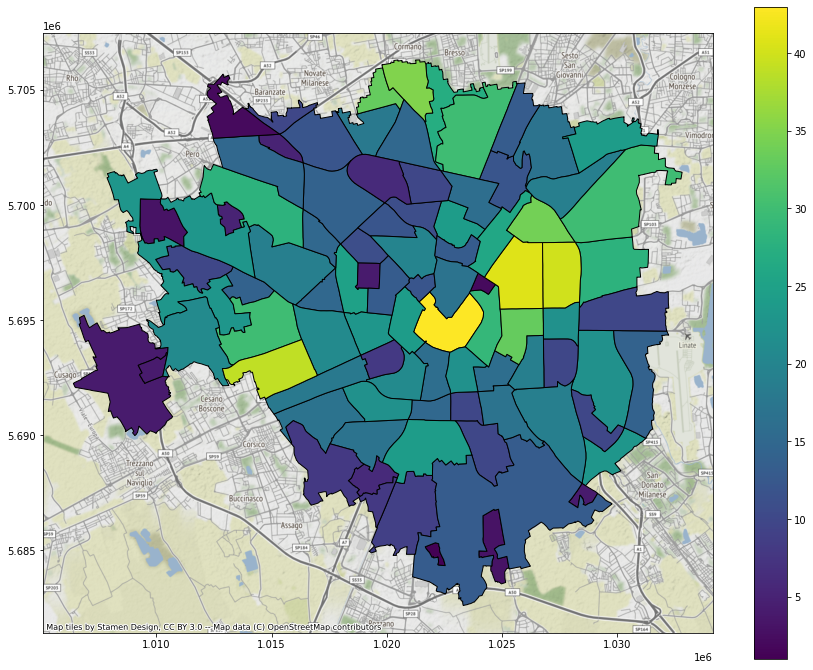

In [39]:
bus_quart = pd.merge(quartieri, linee_quart1, on='NIL', how='left')
bus_quart
ax = bus_quart.to_crs(3857).plot(figsize=(15,12), edgecolor='k', legend=True, column='mezzo')
ctx.add_basemap(ax)

# **Verifica Quartieri-Giardini**

In [40]:
giardini= geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/eserciziGeoPandas/Verifica16 02 2022/parchi.geojson')
giardini

,Municipio,Codice area,VIA,LOCALITA,SPECIFICA_LOCALITA,Tipo,Mese,Orario apertura,Orario chiusura,Note,Location,Longitudine,Latitudine,geometry
0,1,1082,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno,Calcio a 7,GENNAIO,7,19,None,"45.45328556, 9.194352193",9.194352,45.453286,POINT (9.19435 45.45329)
1,1,1082,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno,Calcio a 7,FEBBRAIO,7,19,None,"45.45328556, 9.194352193",9.194352,45.453286,POINT (9.19435 45.45329)
2,1,1082,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno,Calcio a 7,MARZO,7,20,None,"45.45328556, 9.194352193",9.194352,45.453286,POINT (9.19435 45.45329)
3,1,1082,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno,Calcio a 7,APRILE,7,21,None,"45.45328556, 9.194352193",9.194352,45.453286,POINT (9.19435 45.45329)
4,1,1082,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno,Calcio a 7,MAGGIO,7,22,None,"45.45328556, 9.194352193",9.194352,45.453286,POINT (9.19435 45.45329)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,9,9546,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...,Basket,AGOSTO,7,22:30,None,"45.521971, 9.213884",9.213884,45.521971,POINT (9.21388 45.52197)
6368,9,9546,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...,Basket,SETTEMBRE,7,21,None,"45.521971, 9.213884",9.213884,45.521971,POINT (9.21388 45.52197)
6369,9,9546,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...,Basket,OTTOBRE,7,20,None,"45.521971, 9.213884",9.213884,45.521971,POINT (9.21388 45.52197)
6370,9,9546,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...,Basket,NOVEMBRE,7,20,None,"45.521971, 9.213884",9.213884,45.521971,POINT (9.21388 45.52197)


In [41]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/eserciziGeoPandas/Geopandas - esercizio riepilogativo in preparazione alla verifica/ds964_nil_wm (1).zip')
quartieri = quartieri.to_crs(4326)
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


Esercizio 1

In [42]:
grd_qrt= geopandas.sjoin(giardini,quartieri,op='intersects',how='left')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [43]:
nil_imp=input('')
qrt_ins=grd_qrt[grd_qrt.NIL==nil_imp]
qrt_ins[['NIL','LOCALITA','SPECIFICA_LOCALITA']] 
#NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI

NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI


,NIL,LOCALITA,SPECIFICA_LOCALITA
5784,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,Baldacci,None
5785,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,Baldacci,None
5786,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,Baldacci,None
5787,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,Baldacci,None
5788,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,Baldacci,None
...,...,...,...
6067,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,Hermada,sistemazione superficiale parcheggi sotterrane...
6068,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,Hermada,sistemazione superficiale parcheggi sotterrane...
6069,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,Hermada,sistemazione superficiale parcheggi sotterrane...
6070,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,Hermada,sistemazione superficiale parcheggi sotterrane...


Esercizio 2

In [44]:
grd_qrt= geopandas.sjoin(giardini,quartieri,op='intersects',how='left')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [45]:
elenco=grd_qrt[['VIA','LOCALITA','SPECIFICA_LOCALITA']]
elenco

,VIA,LOCALITA,SPECIFICA_LOCALITA
0,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno
1,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno
2,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno
3,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno
4,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno
...,...,...,...
6367,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...
6368,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...
6369,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...
6370,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...


Esercizio 3

In [46]:
grd_qrt= geopandas.sjoin(giardini,quartieri,op='intersects',how='left')
num= grd_qrt.groupby('NIL')['LOCALITA'].count().reset_index()
num1= num.sort_values(ascending= True, by= 'LOCALITA')[['NIL','LOCALITA']]
num1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,NIL,LOCALITA
22,GRECO - SEGNANO,12
12,CITTA' STUDI,12
41,PARCO NORD,12
39,PARCO DELLE ABBAZIE,12
37,PAGANO,12
...,...,...
50,Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO,228
38,PARCO BOSCO IN CITTA',240
34,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,240
1,AFFORI,252


Esercizio 4

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


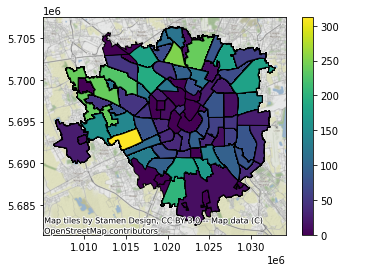

In [47]:
grd_qrt= geopandas.sjoin(quartieri,giardini,op='intersects',how='left')
num= grd_qrt.groupby('NIL')['LOCALITA'].count().reset_index()
giardini_qrt= pd.merge(grd_qrt,num, how='inner',on=['NIL'])
giardini_qrt
ax=giardini_qrt.to_crs(epsg=3857).plot(column='LOCALITA_y',legend=True, edgecolor='k')
ctx.add_basemap(ax)